### **Objective**

The objective of this project is to develop a predictive model that can help classify breast tumors as either malignant (cancerous) or benign (non-cancerous) based on these computed features. Using this model, *healthcare professionals / analysts* could automate parts of the diagnostic process, assisting them in early detection of breast cancer and potentially improving treatment outcomes.

### **Problem Statement**

Breast cancer is a critical health issue that requires accurate and timely diagnosis for effective treatment. Traditional diagnostic methods, including manual examination of mammograms and tissue samples, can be subjective and prone to human error. The goal is to develop an automated system using machine learning to classify breast tumors as either malignant (cancerous) or benign (non-cancerous) based on patient data, such as characteristics of the tumor cells.

The problem to solve is: **How can we build a reliable machine learning model that accurately classifies breast tumors as malignant or benign based on their characteristics, in order to support early diagnosis and improve treatment outcomes for breast cancer patients?**

This statement focuses on the following key aspects:
1. Accuracy: Ensuring the model can differentiate between malignant and benign tumors with high precision.
2. Timeliness: Reducing the time needed to provide diagnoses.
3. Healthcare Impact: Supporting healthcare professionals in making informed and reliable diagnostic decisions.

### **Dataset Overview**

- Rows (Samples): 569
- Columns (Features): 32, including:
    - ID: Unique identifier for each sample.
    - Diagnosis: The target variable, indicating whether the tumor is malignant ("M") or benign ("B").
    - 30 Features: Numeric attributes based on characteristics of the cell nuclei, such as radius, texture, smoothness, compactness, concavity, symmetry, etc.
    - Unnamed Column: A redundant column that can be ignored or removed.

### **Features Explanation**

Each feature represents some computed characteristic of the cells in the sample:

- Mean: The average value of the characteristic (e.g., radius_mean, texture_mean).
- Standard Error (SE): Variation in the characteristic (e.g., radius_se, texture_se).
- Worst: The worst or largest value recorded for each characteristic (e.g., radius_worst, texture_worst).
  
- Some important features:
    1. Radius     :  The mean of distances from the center to points on the perimeter of the mass.
    2. Texture    :  Standard deviation of grayscale values.
    3. Perimeter  :  The contour length around the tumor.
    4. Area       :  The area occupied by the mass.
    5. Smoothness :  How smooth the boundaries of the mass are.
    6. Compactness:  A ratio of perimeter squared to area—indicating how "tight" the mass is.
    7. Concavity  :  Measures the severity of concave parts of the contour.
    8. Symmetry   :  How symmetric the mass appears.

### **Correlation Between Mean, SE & Worst**

1. Mean (Average)
    - The mean represents the central tendency of a specific feature across the tumor’s cell nuclei. For example, the radius_mean indicates the average radius of the tumor cells.
    - A large mean for features like radius or perimeter might suggest that the tumor is larger, which could be an indicator of malignancy. Many malignant tumors tend to have larger cell sizes, rougher textures, and more irregular shapes than benign tumors.
    - By capturing the average values, the model can help distinguish between benign (regular) and malignant (irregular) growths.

2. Standard Error (SE)
    - Standard error measures the variation or dispersion of a particular feature across the tumor cells. It shows how much the individual measurements of a feature (e.g., radius_se, texture_se) fluctuate around the mean.
    - Inconsistent measurements of certain features might be indicative of more aggressive, less homogeneous growth, which is often associated with malignancy.
    - SE helps in understanding this variability. For instance, a high concavity_se or perimeter_se suggests the tumor has cells with widely varying concave regions or perimeter sizes, a common trait of malignant tumors.
      
3. Worst (Maximum)
    - The "worst" feature refers to the largest or most extreme value recorded for each feature (e.g., radius_worst, texture_worst).
    - The maximum or worst-case measurement can highlight the most aggressive features of the tumor. Malignant tumors often have certain regions that are far more abnormal than others.
    - The worst values help capture the extreme characteristics of a tumor, which could otherwise be missed if only average values were considered. These extreme values may indicate potential malignant behavior even if the mean values look less suspicious.

### **Data PreProcessing**

Import Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA

sns.set()
plt.style.use('ggplot')

Load the Data

In [2]:
df = pd.read_csv('data.csv')
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


Data Preview

In [3]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


Data Size

In [4]:
df.shape

(569, 33)

Data Types

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [6]:
df.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

Statistical Overview

In [7]:
import seaborn as sns
import matplotlib as mpl

# Filter the DataFrame for benign diagnoses
benign_summary = df[df['diagnosis'] == 'B'].describe().transpose()

# Create a color palette and convert it to a ListedColormap
palette = sns.color_palette("muted")
cmap = mpl.colors.ListedColormap(palette)

# Apply the background gradient to the summary DataFrame
benign_summary.style.background_gradient(cmap=cmap)

,count,mean,std,min,25%,50%,75%,max
id,357.000000,26543824.624650,116739662.026928,8913.000000,874662.000000,908916.000000,8812816.000000,911320502.000000
radius_mean,357.000000,12.146524,1.780512,6.981000,11.080000,12.200000,13.370000,17.850000
texture_mean,357.000000,17.914762,3.995125,9.710000,15.150000,17.390000,19.760000,33.810000
perimeter_mean,357.000000,78.075406,11.807438,43.790000,70.870000,78.180000,86.100000,114.600000
area_mean,357.000000,462.790196,134.287118,143.500000,378.200000,458.400000,551.100000,992.100000
smoothness_mean,357.000000,0.092478,0.013446,0.052630,0.083060,0.090760,0.100700,0.163400
compactness_mean,357.000000,0.080085,0.033750,0.019380,0.055620,0.075290,0.097550,0.223900
concavity_mean,357.000000,0.046058,0.043442,0.000000,0.020310,0.037090,0.059990,0.410800
concave points_mean,357.000000,0.025717,0.015909,0.000000,0.015020,0.023440,0.032510,0.085340
symmetry_mean,357.000000,0.174186,0.024807,0.106000,0.158000,0.171400,0.189000,0.274300


In [8]:
# Filter the DataFrame for malignant diagnoses
malignant_summary = df[df['diagnosis'] == 'M'].describe().transpose()

# Create a color palette and convert it to a ListedColormap
palette = sns.color_palette("dark")
cmap = mpl.colors.ListedColormap(palette)

# Apply the background gradient to the summary DataFrame
malignant_summary.style.background_gradient(cmap=cmap)

,count,mean,std,min,25%,50%,75%,max
id,212.000000,36818050.443396,137896549.641875,8670.000000,861345.000000,895366.500000,8911289.750000,911296202.000000
radius_mean,212.000000,17.462830,3.203971,10.950000,15.075000,17.325000,19.590000,28.110000
texture_mean,212.000000,21.604906,3.779470,10.380000,19.327500,21.460000,23.765000,39.280000
perimeter_mean,212.000000,115.365377,21.854653,71.900000,98.745000,114.200000,129.925000,188.500000
area_mean,212.000000,978.376415,367.937978,361.600000,705.300000,932.000000,1203.750000,2501.000000
smoothness_mean,212.000000,0.102898,0.012608,0.073710,0.094010,0.102200,0.110925,0.144700
compactness_mean,212.000000,0.145188,0.053987,0.046050,0.109600,0.132350,0.172400,0.345400
concavity_mean,212.000000,0.160775,0.075019,0.023980,0.109525,0.151350,0.203050,0.426800
concave points_mean,212.000000,0.087990,0.034374,0.020310,0.064620,0.086280,0.103175,0.201200
symmetry_mean,212.000000,0.192909,0.027638,0.130800,0.174050,0.189900,0.209850,0.304000


Data Exploring

In [9]:
# to know the number of every values in every columns
for col in df.columns:
    print(f"\ncounts of item in {col} -->> \n {df[col].value_counts()}")
    print("-" * 50)


counts of item in id -->> 
 id
842302     1
90250      1
901315     1
9013579    1
9013594    1
          ..
873885     1
873843     1
873701     1
873593     1
92751      1
Name: count, Length: 569, dtype: int64
--------------------------------------------------

counts of item in diagnosis -->> 
 diagnosis
B    357
M    212
Name: count, dtype: int64
--------------------------------------------------

counts of item in radius_mean -->> 
 radius_mean
12.34    4
11.71    3
12.46    3
13.05    3
10.26    3
        ..
12.23    1
14.45    1
19.18    1
18.08    1
7.76     1
Name: count, Length: 456, dtype: int64
--------------------------------------------------

counts of item in texture_mean -->> 
 texture_mean
20.52    3
16.85    3
16.84    3
19.83    3
14.93    3
        ..
18.58    1
15.11    1
22.41    1
14.92    1
24.54    1
Name: count, Length: 479, dtype: int64
--------------------------------------------------

counts of item in perimeter_mean -->> 
 perimeter_mean
82.61     3
87

In [10]:
# to know the uniques values in evey column in the dataset:
for col in df.columns:
    print(f"All items in the ---->>>{col} column  :  \n{df[col].unique()}")
    print("*"*50)

All items in the ---->>>id column  :  
[   842302    842517  84300903  84348301  84358402    843786    844359
  84458202    844981  84501001    845636  84610002    846226    846381
  84667401  84799002    848406  84862001    849014   8510426   8510653
   8510824   8511133    851509    852552    852631    852763    852781
    852973    853201    853401    853612  85382601    854002    854039
    854253    854268    854941    855133    855138    855167    855563
    855625    856106  85638502    857010  85713702     85715    857155
    857156    857343    857373    857374    857392    857438  85759902
    857637    857793    857810    858477    858970    858981    858986
    859196  85922302    859283    859464    859465    859471    859487
    859575    859711    859717    859983   8610175   8610404   8610629
   8610637   8610862   8610908    861103   8611161   8611555   8611792
   8612080   8612399  86135501  86135502    861597    861598    861648
    861799    861853    862009    8620

Data Cleaning

In [11]:
df.isna().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [12]:
# to change name of column Unnamed: 32 into Unnamed :
df.rename(columns={'Unnamed: 32': 'Unnamed'}, inplace=True)
df.head(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [13]:
# to remove unnecessary Column :
df = df.drop(columns=["Unnamed", "id"], errors='ignore')
df.head(5)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [14]:
# to check if there's any duplicate data :
df.duplicated().sum()

0

In [15]:
df.diagnosis.unique()

array(['M', 'B'], dtype=object)

In [16]:
df['diagnosis'] = df['diagnosis'].apply(lambda val:1 if val == 'M' else 0)
df.head(3)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


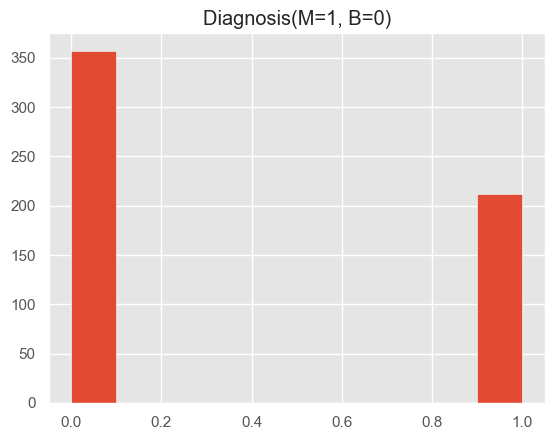

In [17]:
plt.hist(df['diagnosis'])
plt.title('Diagnosis(M=1, B=0)')
plt.show()

### Exploratory Data Analysis

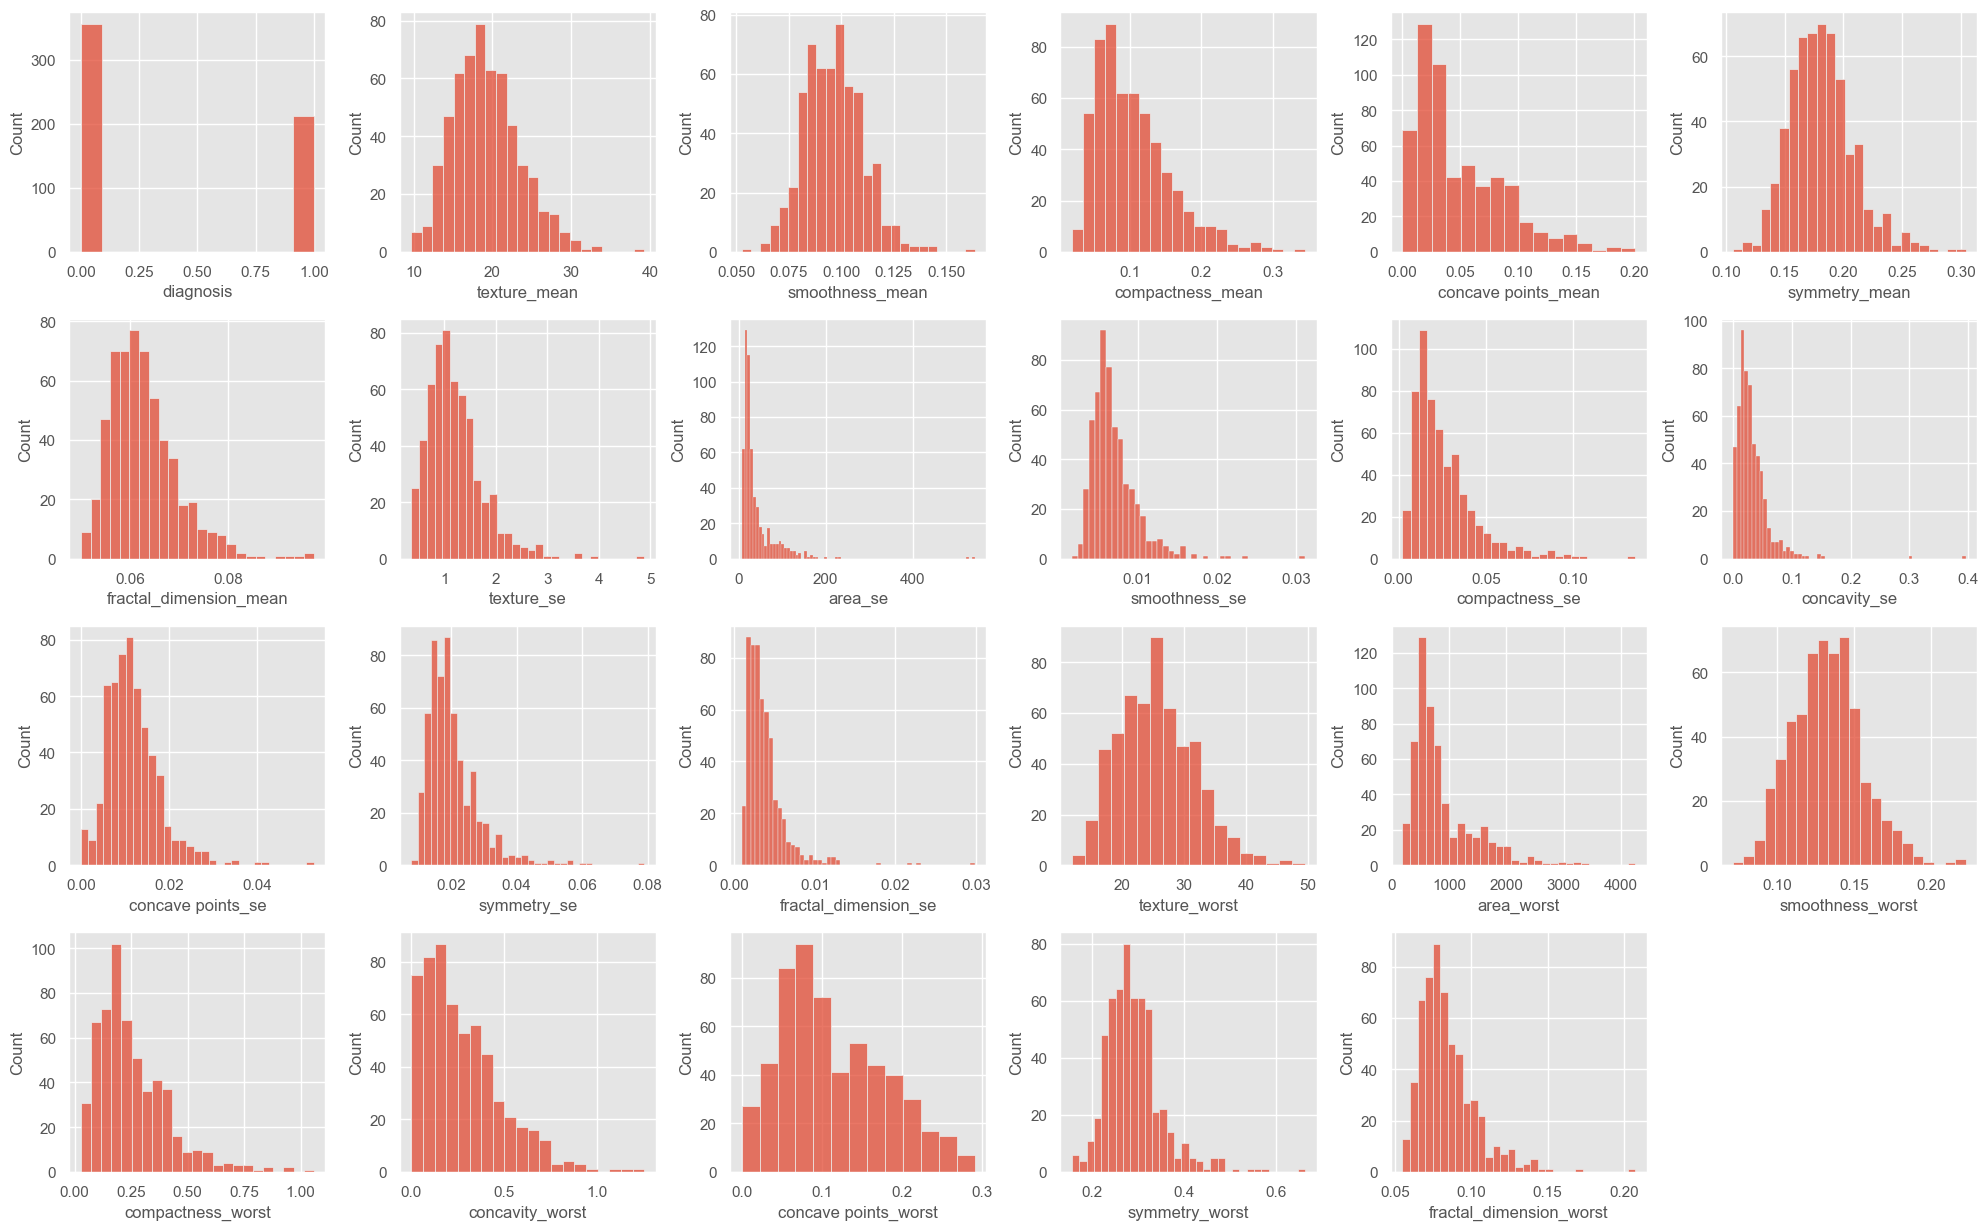

In [66]:
plt.figure(figsize=(20, 15))
plotnumber = 1
for column in df:
    if plotnumber <= 30:
        ax = plt.subplot(5, 6, plotnumber)
        sns.histplot(df[column])
        plt.xlabel(column)
    plotnumber += 1

plt.tight_layout()
plt.show()

**1. Diagnosis**

- Explanation:
      The first graph shows a bimodal distribution, where two distinct peaks represent the distribution of benign (0) and malignant (1) cases. Malignant cases seem to be fewer than benign, but the gap isn't too large.

- Impact:
    This serves as the target variable we are trying to predict, based on the other features.

**2. Radius**

- Mean: The radius_mean shows a distribution with a right skew. Higher radius values can indicate larger tumors, which are often malignant.
  
- SE: The radius_se is smaller and has a right skew as well. The standard error captures the variability of the radius values across the tumor’s cell nuclei.

  
- Worst: The radius_worst graph is skewed even further to the right, indicating that in malignant tumors, there are regions with significantly larger cells.

  
- Correlation: Typically, if the radius_mean is large, the radius_worst will also be large, but the SE helps identify variability within the tumor. High variability in radius could suggest malignancy.

**3. Texture**

- Mean: The texture_mean graph has a roughly normal distribution, with some higher values indicating tumors that are more irregular.

- SE: Texture_se has a right-skewed distribution. Variability in texture can indicate unevenness, which may be a characteristic of malignant tumors.

- Worst: The distribution of texture_worst follows a pattern similar to the mean but is shifted towards higher values, indicating that in the worst cases, malignant tumors have more irregular textures.

- Correlation: The texture features indicate how "rough" or "smooth" the tumor cells are. Malignant tumors tend to have more variability in texture, as shown by the texture_se.

**4. Perimeter**

- Mean: Perimeter_mean follows a similar distribution to radius_mean since the perimeter is correlated with the size of the tumor.

- SE: Perimeter_se also shows a right-skewed distribution. Greater variability in perimeter can indicate abnormal growth patterns

- Worst: The perimeter_worst is skewed significantly to the right, capturing the most aggressive cases where the tumor has an irregular or large perimeter.

- Correlation: A larger perimeter in both mean and worst cases is often linked with malignant tumors. High SE indicates significant variability, often seen in malignant growth.

**5. Area**

- Mean: The area_mean graph is heavily right-skewed. Larger areas tend to correspond to malignant tumors.

- SE: The area_se graph is also right-skewed, but with much smaller values. The SE shows variability within the tumor's structure.
  
- Worst: Area_worst is highly skewed to the right, indicating that some malignant tumors have significantly larger areas compared to benign tumors.

- Correlation: Large areas are indicative of malignancy, especially if the worst areas show significant deviations from the mean. High SE also correlates with malignancy.

**6. Smoothness**

- Mean: Smoothness_mean shows a normal distribution. This measures how smooth or rough the tumor boundary is.

- SE: Smoothness_se is right-skewed, suggesting that variability in smoothness might be higher for malignant tumors.

- Worst: The smoothness_worst graph shows a wider spread of values, which is likely due to the higher irregularity in the boundaries of malignant tumors.

- Correlation: Malignant tumors tend to have irregular boundaries, reflected in higher smoothness SE and worst values.

**7. Compactness**

- Mean: Compactness_mean is right-skewed, with malignant tumors tending to be more compact (higher values).

- SE: Compactness_se has a sharp right skew, indicating variability in the compactness of the tumor cells.

- Worst: Compactness_worst shows more extreme cases of compactness, especially for malignant tumors.

- Correlation: Malignant tumors often show higher compactness due to irregular growth patterns, and the SE helps highlight inconsistencies within the tumor.

**8. Concavity**

- Mean: The concavity_mean is skewed to the right, with malignant tumors showing more concavity (higher values).

- SE: Concavity_se shows that malignant tumors have high variability in concavity across different regions.

- Worst: The concavity_worst graph is right-skewed, with extreme concavity in the most malignant tumors.

- Correlation: Concavity indicates how much of the tumor boundary has inward curves. Malignant tumors typically exhibit higher concavity and greater variability, as shown by SE and worst values.

**9. Concave Points**

- Mean: The concave points_mean graph is similar to concavity, with more concave points indicating malignancy.

- SE: Concave points_se is right-skewed, suggesting variability in the concave points.

- Worst: Concave points_worst shows higher values in malignant cases, indicating extreme concave regions in some tumors.

- Correlation: Concave points represent inward indentations on the tumor surface. More concave points are associated with malignant tumors.

**10. Symmetry**

- Mean: Symmetry_mean is slightly skewed to the right, with less symmetric tumors likely being malignant.

- SE: Symmetry_se is right-skewed but with lower values.

- Worst: Symmetry_worst shows higher values in malignant tumors, indicating asymmetrical growth patterns.

- Correlation: Tumor symmetry plays a role in diagnosis. Malignant tumors are typically more asymmetrical, as shown by higher worst and SE values.

**11. Fractal Dimension**

- Mean: The fractal_dimension_mean graph is right-skewed. Higher fractal dimensions may indicate irregularity and complexity in the tumor shape.

- SE: Fractal_dimension_se has a small spread, indicating slight variations in fractal dimension across the tumor surface.

- Worst: The fractal_dimension_worst graph shows more extreme fractal dimensions, which may correspond to malignant tumors.

- Correlation: Fractal dimension measures the complexity of the tumor boundary. Higher fractal dimensions suggest more irregular and potentially malignant tumors.

**Cross-Feature Impact**

1. **Radius, Perimeter, and Area** are highly correlated because larger tumors will naturally have larger perimeters and areas.
2. **Concavity, Compactness, and Smoothness** are related to the shape of the tumor. Irregular, compact, and rough-edged tumors are typically more malignant.
3. **Symmetry and Fractal Dimension** capture the complexity and irregularity of the tumor boundary. Malignant tumors usually show higher values in these features.

Correlation

In [19]:
df.corr()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,0.330499,...,0.776454,0.456903,0.782914,0.733825,0.421465,0.590998,0.659610,0.793566,0.416294,0.323872
radius_mean,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,0.330499,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413


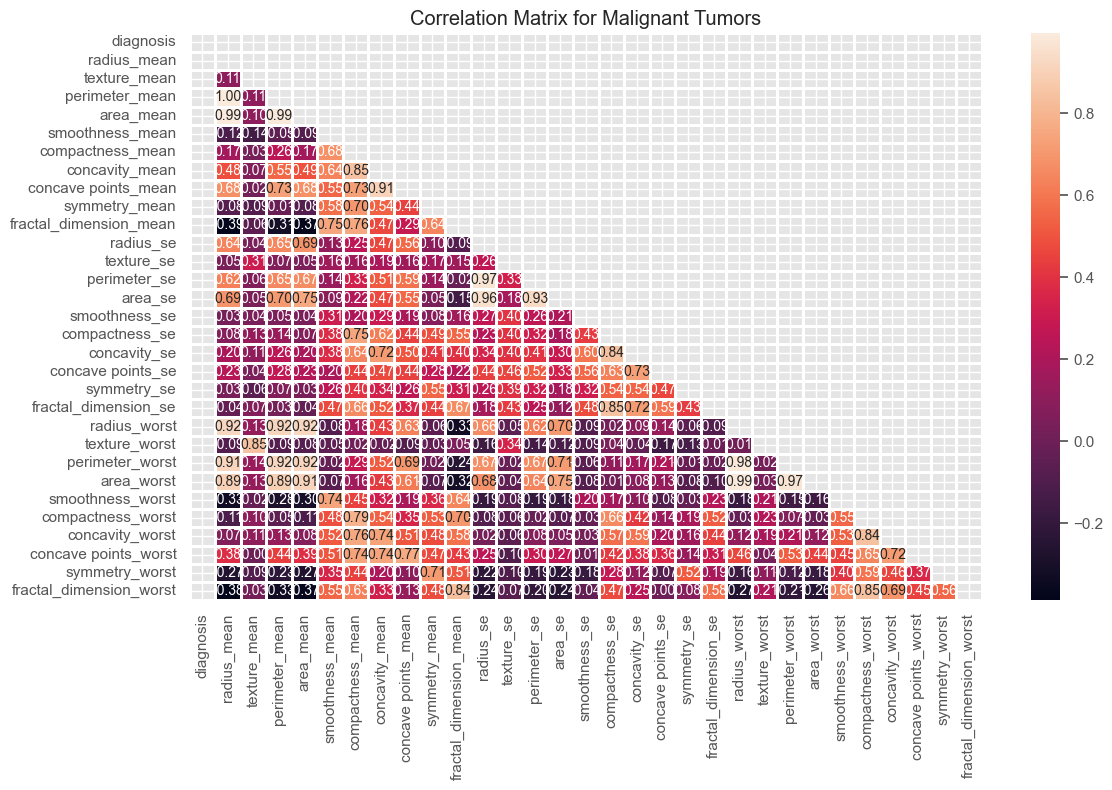

In [20]:
# Correlation matrix for malignant cases
malignant_corr = df[df['diagnosis'] == 1].corr()

# Plot heatmaps to visualize
plt.figure(figsize=(12, 8))
mask = np.triu(np.ones_like(malignant_corr, dtype=bool))
sns.heatmap(malignant_corr, mask=mask, linewidths=1, annot=True, fmt=".2f")
plt.title("Correlation Matrix for Malignant Tumors")
plt.tight_layout()
plt.show()

**Malignant Tumors Correlation Heatmap**

The heatmap for malignant tumors highlights the following characteristics:

1. *High Correlations:*

    - Features like radius_worst, perimeter_worst, and area_worst show strong positive correlations with each other.
    - This makes sense because these features all describe the tumor's size, and malignant tumors tend to grow aggressively, leading to larger maximum measurements.
    - Similarly, radius_mean and area_mean are strongly correlated, as larger tumors will have higher average radii and areas.The worst features (e.g., concave_points_worst, concavity_worst) are also highly correlated, reflecting the irregular shapes of cancerous tumors.


2. *Moderate Correlations:*

    - Texture_mean and smoothness_mean show moderate correlations with other features like area_mean. This indicates that as tumors grow, they tend to change their texture and smoothness, though not as strongly as the size-related features.
    - Concavity_mean and concave_points_mean are also moderately correlated, which makes sense as more concave points suggest more overall concavity in the tumor shape.


3. *Low Correlations:*

    - Features like fractal_dimension_mean and symmetry_mean have weaker correlations with size-related features (like radius_mean), suggesting that these features capture more subtle aspects of the tumor’s complexity and aren’t directly tied to the tumor's size.

In summary, malignant tumors exhibit strong correlations between size-related features and shape irregularity, likely because aggressive tumor growth affects both.

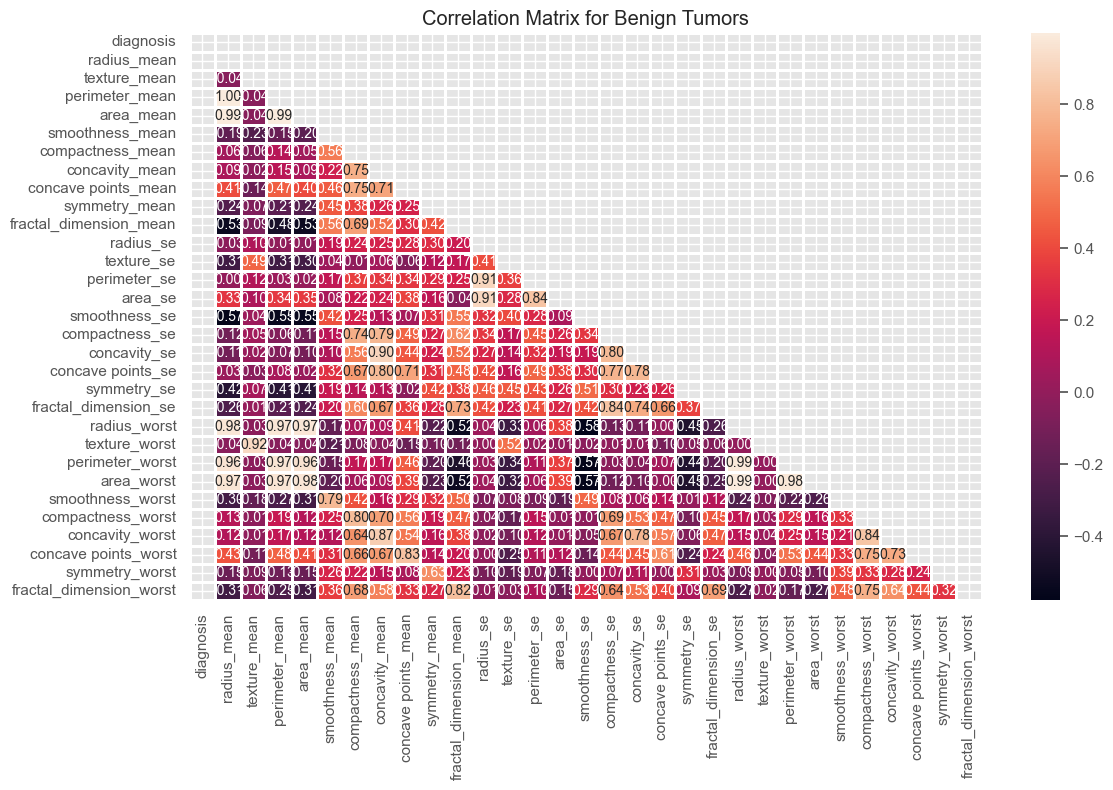

In [21]:
# Correlation matrix for benign cases
benign_corr = df[df['diagnosis'] == 0].corr()

# Plot heatmaps to visualize
plt.figure(figsize=(12, 8))
mask = np.triu(np.ones_like(benign_corr, dtype=bool))
sns.heatmap(benign_corr, mask=mask, linewidths=1, annot=True, fmt=".2f")
plt.title("Correlation Matrix for Benign Tumors")
plt.tight_layout()
plt.show()

**Benign Tumors Correlation Heatmap**

For benign tumors, the heatmap shows a different pattern of correlations:

1. *High Correlations:*

    - Radius_mean, perimeter_mean, and area_mean remain highly correlated, as these features naturally scale together due to geometry.
    - However, the correlations might be slightly weaker compared to malignant cases because benign tumors grow more uniformly and predictably.
      
2. *Moderate to Low Correlations:*
   
    - Concavity_mean and concave_points_mean show much weaker correlations in benign tumors compared to malignant ones.
    - This makes sense because benign tumors tend to be more smooth and rounded, with fewer indentations and irregularities, leading to less pronounced relationships between these features.
    - The standard error features (e.g., radius_se, texture_se) tend to show weaker correlations in benign tumors, reflecting the lower variability in their structure.
      
3. *Fractal Dimension and Symmetry:*

    - Similar to malignant tumors, fractal_dimension_mean and symmetry_mean still exhibit low correlations with size-related features, suggesting that even in benign cases, these features capture more unique aspects of the tumor.
      
In summary, benign tumors show strong correlations among size-related features but weaker correlations between shape irregularity and concavity-related features. This reflects the more uniform growth patterns of benign tumors.

**General Conclusion**

- *Malignant Tumors*: Strong correlations between size features (e.g., radius, perimeter, area) and irregularity features (e.g., concavity, concave points) indicate aggressive growth and abnormal shapes.
- *Benign Tumors*: Strong correlations between size features, but weaker correlations between shape features reflect the smoother, more uniform growth of non-cancerous tumors.

In [22]:
corr_matrix = df.corr().abs()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
tri_df = corr_matrix.mask(mask)

to_drop = [x for x in tri_df.columns if any(tri_df[x]>0.92)]

df = df.drop(to_drop, axis = 1)
print(df.shape[1])

23


**Highly Correlated Features**

- Definition: Highly correlated features are variables in your dataset that move together. For example, if the radius, perimeter, and area of a tumor are all highly correlated, it means that knowing one of these values can give you a good estimate of the others.

- Redundancy: When features are highly correlated, they provide similar information to a model. This redundancy can be problematic because:

- Overfitting: The model might learn to rely too heavily on these redundant features, which can hurt its ability to generalize to new data.
  
- Increased Complexity: Having many correlated features can complicate the model without adding significant value.

- Dimensionality Reduction: Techniques like Principal Component Analysis (PCA) can help. PCA transforms the correlated features into a smaller set of uncorrelated features (principal components). This reduces redundancy and retains the most important information for modeling.

**Lower Correlations**

- Independence: Features with weak or no correlation may capture different aspects of the data. For instance, fractal dimension and symmetry might not be directly related to size but could still provide valuable insights into the tumor's characteristics.

- Unique Predictive Value: These independent features can be critical in distinguishing between different classes (e.g., benign vs. malignant tumors). They may capture nuances that are important for diagnosis but not reflected in size-related measurements.

- Enhanced Model Performance: Including these unique features can improve model performance by providing additional information that helps in making accurate predictions. They might help capture subtle patterns that would otherwise be missed.


**Summary**

1. Highly Correlated Features: While they provide similar information, they can lead to redundancy and complexity in models. Dimensionality reduction techniques like PCA can be beneficial.

2. Lower Correlations: These features can add unique value to predictive models, helping to identify important patterns that contribute to better diagnosis.

In [23]:
df.head()

,diagnosis,texture_mean,smoothness_mean,compactness_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,texture_se,area_se,smoothness_se,...,symmetry_se,fractal_dimension_se,texture_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,10.38,0.11840,0.27760,0.14710,0.2419,0.07871,0.9053,153.40,0.006399,...,0.03003,0.006193,17.33,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,17.77,0.08474,0.07864,0.07017,0.1812,0.05667,0.7339,74.08,0.005225,...,0.01389,0.003532,23.41,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,21.25,0.10960,0.15990,0.12790,0.2069,0.05999,0.7869,94.03,0.006150,...,0.02250,0.004571,25.53,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,20.38,0.14250,0.28390,0.10520,0.2597,0.09744,1.1560,27.23,0.009110,...,0.05963,0.009208,26.50,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,14.34,0.10030,0.13280,0.10430,0.1809,0.05883,0.7813,94.44,0.011490,...,0.01756,0.005115,16.67,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


### Defiation Outliers

In [24]:
df.dtypes

diagnosis                    int64
texture_mean               float64
smoothness_mean            float64
compactness_mean           float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
texture_se                 float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
texture_worst              float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst            float64
concave points_worst       float64
symmetry_worst             float64
fractal_dimension_worst    float64
dtype: object

In [25]:
features = df.select_dtypes(include="number").columns

for col in features:
    Q1, Q3 = df[col].quantile([0.25, 0.75])
    iqr = Q3 - Q1
    low_limit = Q1 - 1.5 * iqr
    upper_limit = Q3 + 1.5 * iqr
    
    outlier = []
    for x in df[col]:
        if ((x > upper_limit) or (x < low_limit)):
            outlier.append(x)
    print("\n")
    if len(outlier) == 0:
        print(f"There are NO outlier in {col} feature.")
    else:
        print(f"The are outliers in this feature {col}")

    print(f"""
    Q1 of {col}\t--> {Q1}\n
    Q3 of {col}\t--> {Q3}\n
    IQR of {col}\t--> {iqr}\n
    Low Limit\t\t--> {low_limit}\n
    Upper Limit\t\t--> {upper_limit}\n
    No. of outliers\t--> {len(outlier)}
    Outliers\t\t--> {outlier}
    """)
    print("-" * 75)



There are NO outlier in diagnosis feature.

    Q1 of diagnosis	--> 0.0

    Q3 of diagnosis	--> 1.0

    IQR of diagnosis	--> 1.0

    Low Limit		--> -1.5

    Upper Limit		--> 2.5

    No. of outliers	--> 0
    Outliers		--> []
    
---------------------------------------------------------------------------


The are outliers in this feature texture_mean

    Q1 of texture_mean	--> 16.17

    Q3 of texture_mean	--> 21.8

    IQR of texture_mean	--> 5.629999999999999

    Low Limit		--> 7.725000000000003

    Upper Limit		--> 30.244999999999997

    No. of outliers	--> 7
    Outliers		--> [32.47, 33.81, 39.28, 33.56, 31.12, 30.72, 30.62]
    
---------------------------------------------------------------------------


The are outliers in this feature smoothness_mean

    Q1 of smoothness_mean	--> 0.08637

    Q3 of smoothness_mean	--> 0.1053

    IQR of smoothness_mean	--> 0.018930000000000002

    Low Limit		--> 0.057975

    Upper Limit		--> 0.133695

    No. of outliers	--> 6
  

C:\Users\alian\AppData\Local\Temp\ipykernel_5796\272041799.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="outliers",prop={'size': 5})


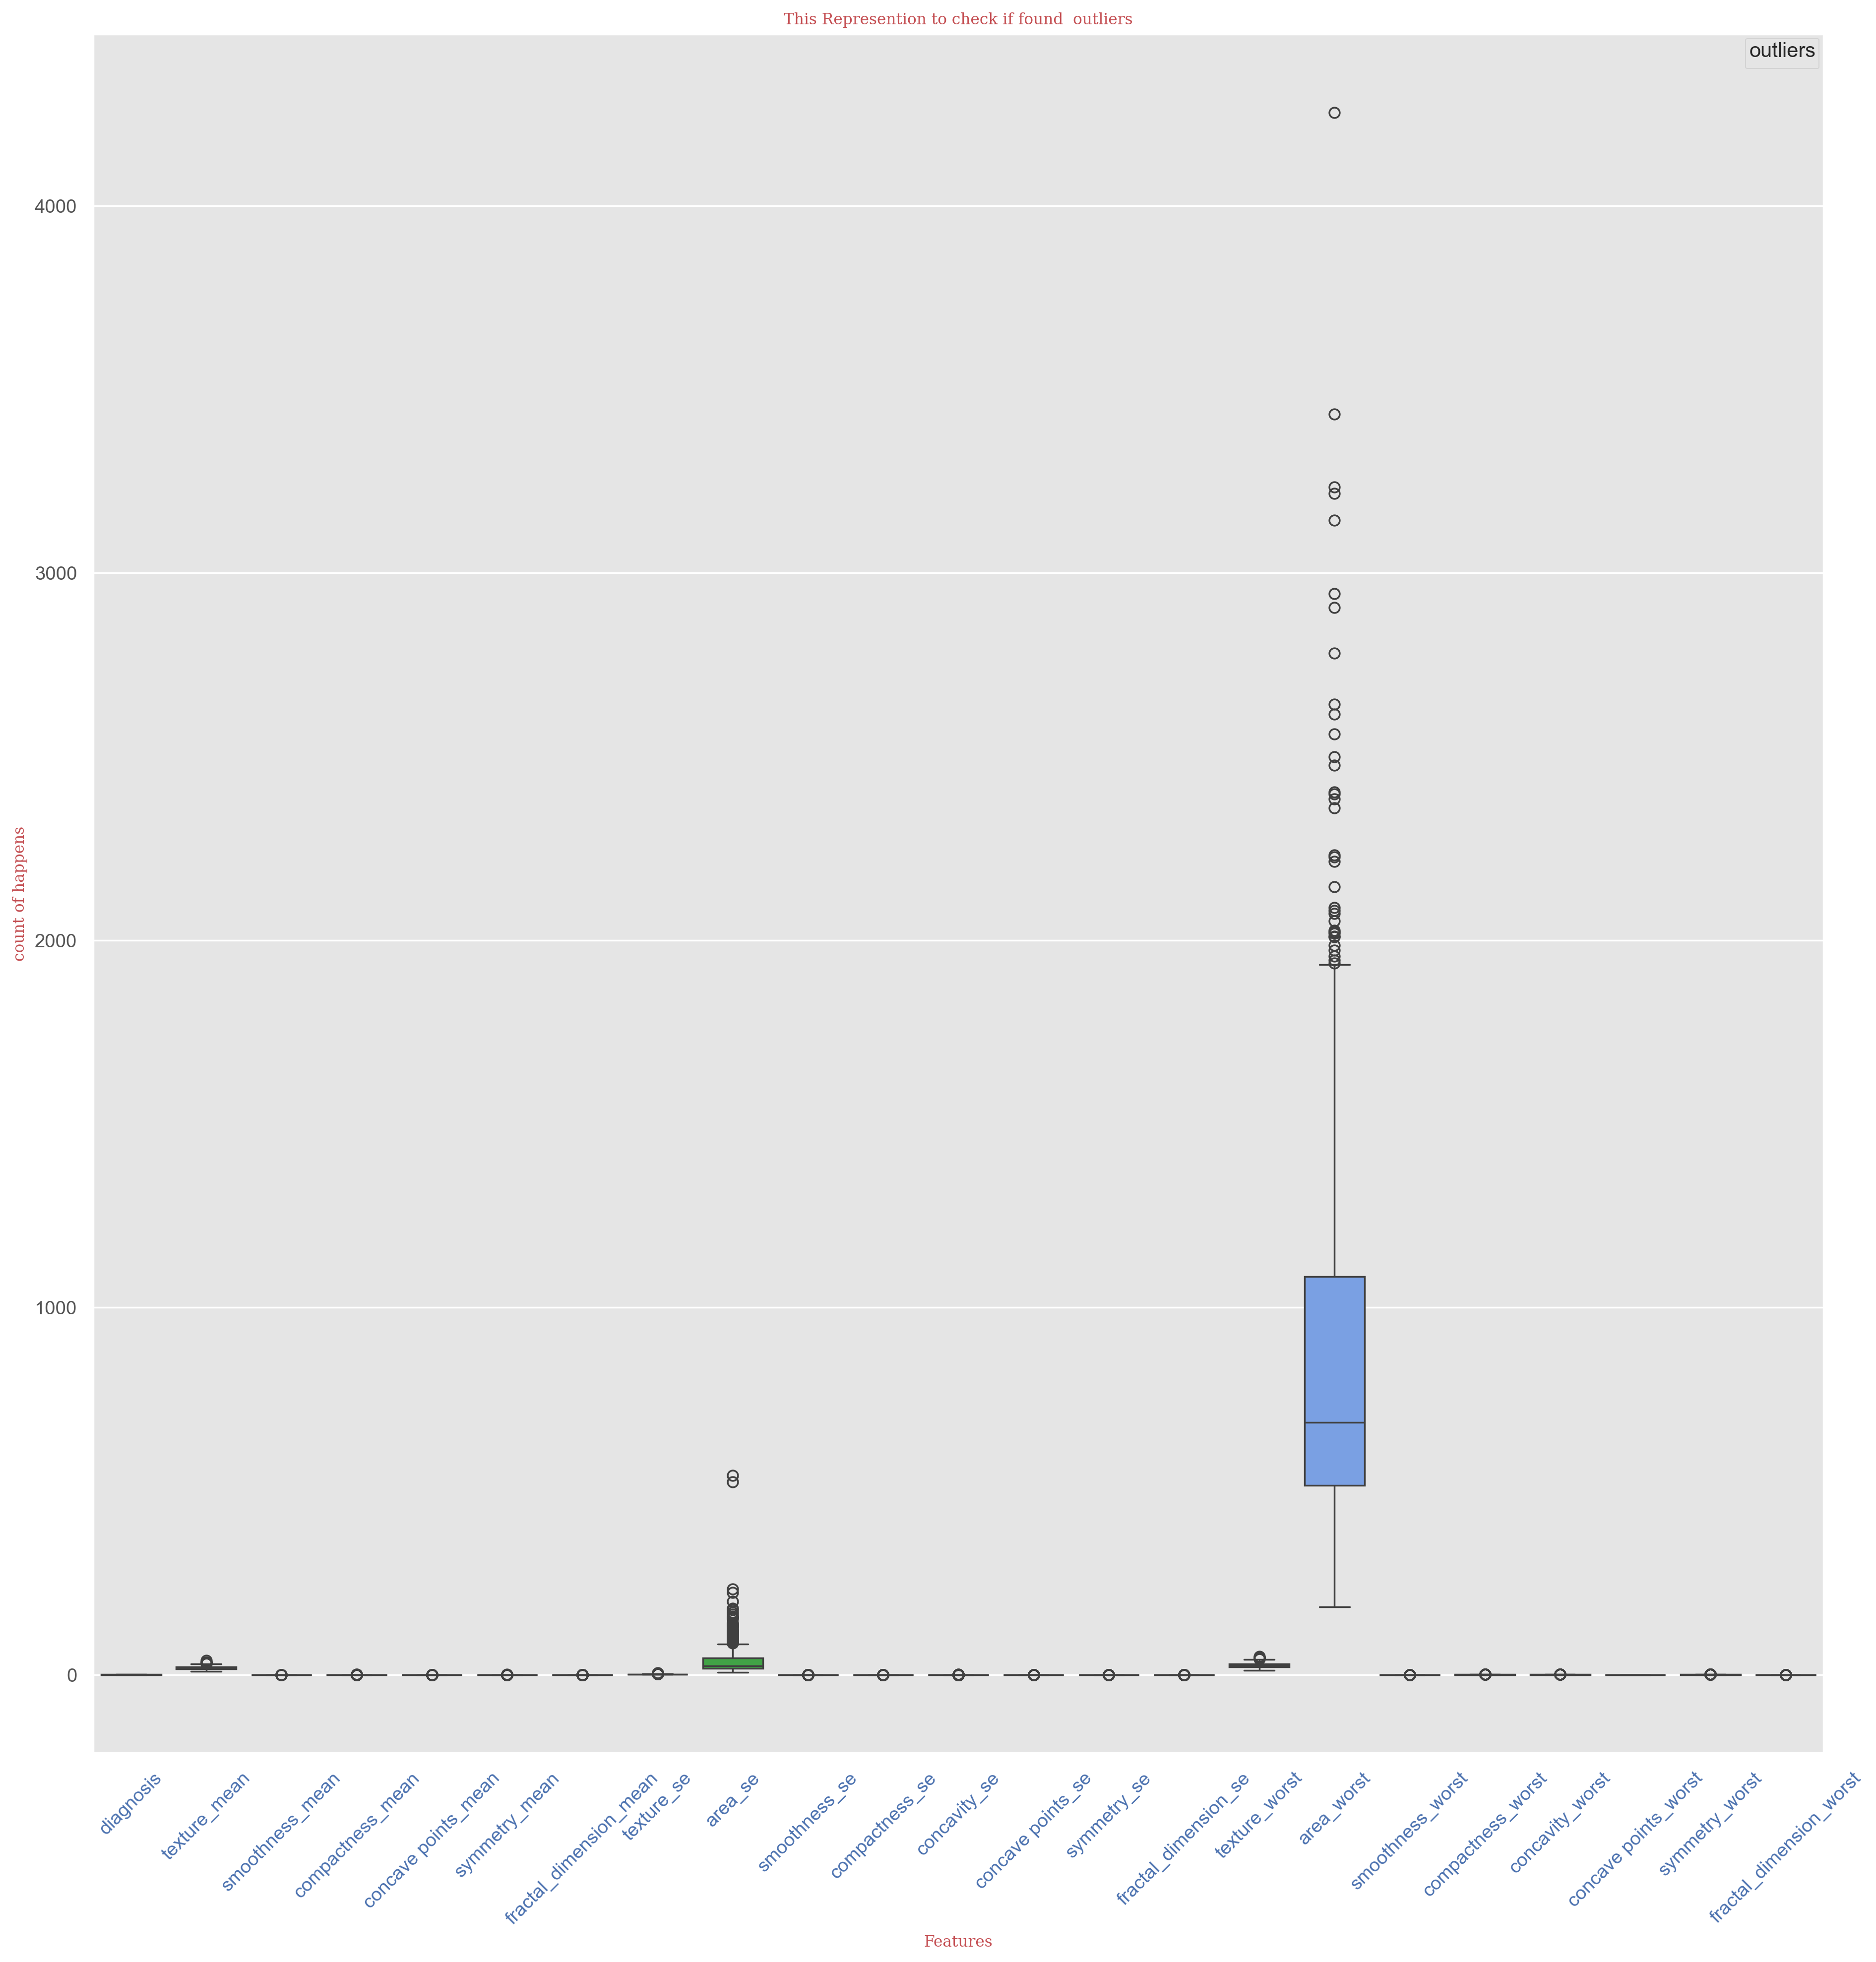

In [26]:
f1={"family":"serif","size":9,"color":"r"}
plt.figure(figsize=(18,18),dpi=250)
plt.title("This Represention to check if found  outliers",fontdict=f1)
plt.xlabel("Features",fontdict=f1)
plt.ylabel("count of happens",fontdict=f1)
plt.xticks(rotation=45,color="b")
sns.boxplot(df[features])
plt.legend(title="outliers",prop={'size': 5})

In our case, we decided to maintain the outliers without having to capping or removing all of it as it may have real clinical or medical significance.

Size-Related Features: Features like radius_mean, area_mean, and perimeter_mean may have outliers that represent unusually large tumors. In this case, such outliers are clinically meaningful because larger tumors are often associated with more advanced malignant conditions.

Shape-Related Features: Outliers in features like texture_mean or texture_points_worst might indicate highly irregular tumor shapes, which are characteristic of aggressive cancer growth. These outliers should be retained for clinical analysis.

### **Building Models**

In [27]:
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

Scaling Data

In [28]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [30]:
X_train.shape

(455, 22)

### 1) Logistic Regression

In [31]:
logistic_regression = LogisticRegression()
logistic_regression.fit(X_train, y_train)

LogisticRegression()

In [32]:
y_pred_log_reg = logistic_regression.predict(X_test)

In [33]:
y_pred_log_reg

array([0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1], dtype=int64)

Accuracy Score

In [34]:
print(accuracy_score(y_train, logistic_regression.predict(X_train)))

0.989010989010989


In [35]:
logistic_regression_accuracy = accuracy_score(y_test, y_pred_log_reg)
logistic_regression_accuracy

0.9736842105263158

In [36]:
print(confusion_matrix(y_test, y_pred_log_reg))

[[70  1]
 [ 2 41]]


In [37]:
print(classification_report(y_test, y_pred_log_reg))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



In [38]:
print("Accuracy is: {:.2f} %".format(accuracy_score(y_pred_log_reg, y_test) * 100))

Accuracy is: 97.37 %


In [39]:
precision_logistic_regression = precision_score(y_test, y_pred_log_reg, average='binary')  # Use 'macro', 'micro', or 'weighted' for multiclass
recall_logistic_regression = recall_score(y_test, y_pred_log_reg, average='binary')
f1_logistic_regression = f1_score(y_test, y_pred_log_reg, average='binary')

# Print the results
print(f"Precision: {precision_logistic_regression}")
print(f"Recall: {recall_logistic_regression}")
print(f"F1-Score: {f1_logistic_regression}")

Precision: 0.9761904761904762
Recall: 0.9534883720930233
F1-Score: 0.9647058823529412


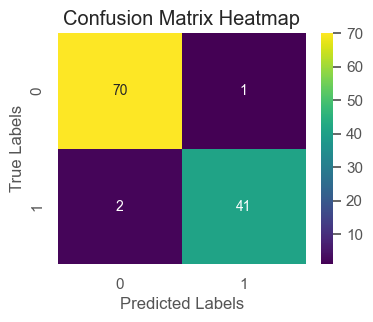

In [40]:
plt.figure(figsize=(4, 3))
sns.heatmap(confusion_matrix(y_test, y_pred_log_reg), annot=True, fmt='d', cmap='viridis')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap')
plt.show()

AUC: 1.00


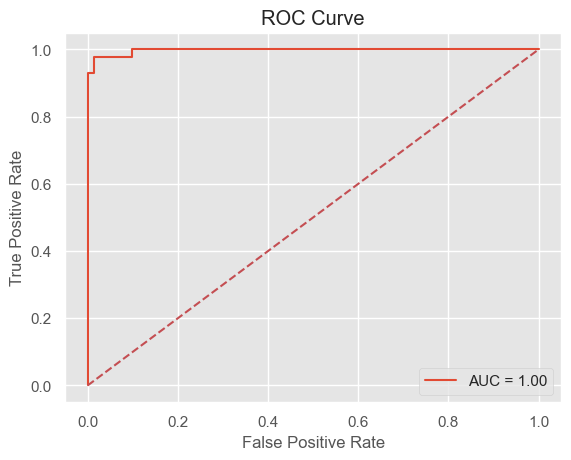

In [41]:
# Predicting probabilities
y_probs_lg = logistic_regression.predict_proba(X_test)[:, 1]

# Calculate AUC score
auc_lg = roc_auc_score(y_test, y_probs_lg)
print(f"AUC: {auc_lg:.2f}")

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs_lg)
plt.plot(fpr, tpr, label=f'AUC = {auc_lg:.2f}')
plt.plot([0, 1], [0, 1], 'r--')  # Random prediction line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

### 2) Random Forest Classifier

In [42]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [43]:
y_pred_rf = rf_model.predict(X_test)

Accuracy Score 

In [44]:
print(accuracy_score(y_train, rf_model.predict(X_train)))

1.0


In [45]:
rf_model_accuracy = accuracy_score(y_test, y_pred_rf)
rf_model_accuracy

0.9649122807017544

In [46]:
print(confusion_matrix(y_test, y_pred_rf))

[[70  1]
 [ 3 40]]


In [47]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97        71
           1       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



In [48]:
print("Accuracy is: {:.2f} %".format(accuracy_score(y_pred_rf, y_test) * 100))

Accuracy is: 96.49 %


In [49]:
precision_rf = precision_score(y_test, y_pred_rf, average='binary')  # Use 'macro', 'micro', or 'weighted' for multiclass
recall_rf = recall_score(y_test, y_pred_rf, average='binary')
f1_rf = f1_score(y_test, y_pred_rf, average='binary')

# Print the results
print(f"Precision: {precision_rf}")
print(f"Recall: {recall_rf}")
print(f"F1-Score: {f1_rf}")

Precision: 0.975609756097561
Recall: 0.9302325581395349
F1-Score: 0.9523809523809523


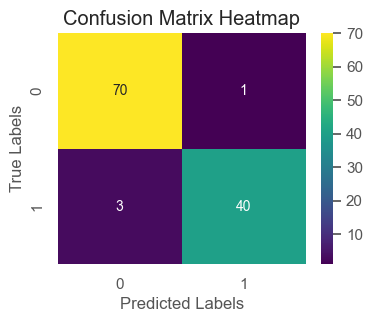

In [50]:
plt.figure(figsize=(4, 3))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='viridis')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap')
plt.show()

AUC: 0.99


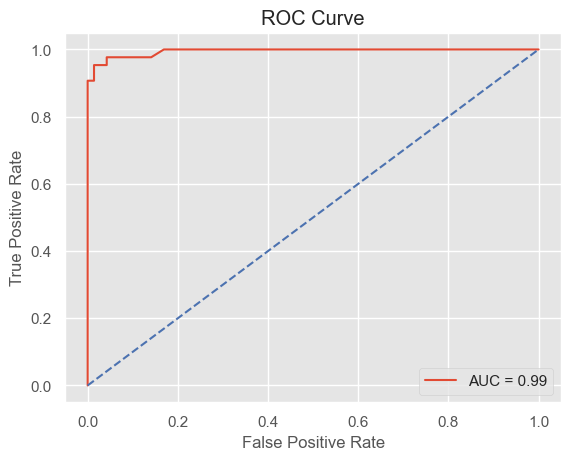

In [51]:
# Predicting probabilities
y_probs_rf = rf_model.predict_proba(X_test)[:, 1]

# Calculate AUC score
auc_rf = roc_auc_score(y_test, y_probs_rf)
print(f"AUC: {auc_rf:.2f}")

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs_rf)
plt.plot(fpr, tpr, label=f'AUC = {auc_rf:.2f}')
plt.plot([0, 1], [0, 1], 'b--')  # Random prediction line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

### 3) K-Nearest Neighbors (KNN)

In [52]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [53]:
y_pred_knn = knn_model.predict(X_test)

Accuracy Score

In [54]:
print(accuracy_score(y_train, knn_model.predict(X_train)))

0.9714285714285714


In [55]:
knn_model_accuracy = accuracy_score(y_test, y_pred_knn)
knn_model_accuracy

0.9385964912280702

In [56]:
print(confusion_matrix(y_test, y_pred_knn))

[[68  3]
 [ 4 39]]


In [57]:
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95        71
           1       0.93      0.91      0.92        43

    accuracy                           0.94       114
   macro avg       0.94      0.93      0.93       114
weighted avg       0.94      0.94      0.94       114



In [58]:
print("Accuracy is: {:.2f} %".format(accuracy_score(y_pred_knn, y_test) * 100))

Accuracy is: 93.86 %


In [59]:
precision_knn = precision_score(y_test, y_pred_knn, average='binary')  # Use 'macro', 'micro', or 'weighted' for multiclass
recall_knn = recall_score(y_test, y_pred_knn, average='binary')
f1_knn = f1_score(y_test, y_pred_knn, average='binary')

# Print the results
print(f"Precision: {precision_knn}")
print(f"Recall: {recall_knn}")
print(f"F1-Score: {f1_knn}")

Precision: 0.9285714285714286
Recall: 0.9069767441860465
F1-Score: 0.9176470588235294


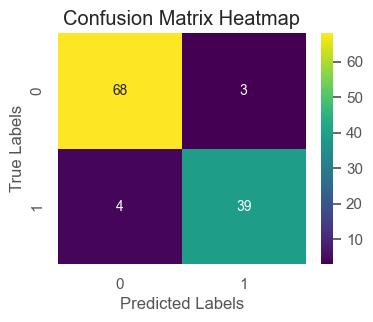

In [60]:
plt.figure(figsize=(4, 3))
sns.heatmap(confusion_matrix(y_test, y_pred_knn), annot=True, fmt='d', cmap='viridis')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap')
plt.show()

AUC: 0.97


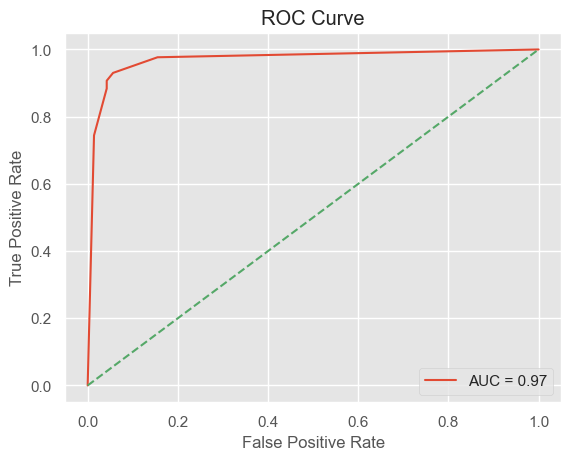

In [61]:
# Predicting probabilities
y_probs_knn = knn_model.predict_proba(X_test)[:, 1]

# Calculate AUC score
auc_knn = roc_auc_score(y_test, y_probs_knn)
print(f"AUC: {auc_knn:.2f}")

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs_knn)
plt.plot(fpr, tpr, label=f'AUC = {auc_knn:.2f}')
plt.plot([0, 1], [0, 1], 'g--')  # Random prediction line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

### **Best Model**

Accuracy Score

In [62]:
# Comparing accuracy score for each model

print("Accuracy Score for each model:\n")
print("1. Logistic Regression\t\t: {:.2f} %".format(accuracy_score(y_pred_log_reg, y_test) * 100))
print("2. Random Forest Classifier\t: {:.2f} %".format(accuracy_score(y_pred_rf, y_test) * 100))
print("3. K_Nearest Neighbors\t\t: {:.2f} %".format(accuracy_score(y_pred_knn, y_test) * 100))

Accuracy Score for each model:

1. Logistic Regression		: 97.37 %
2. Random Forest Classifier	: 96.49 %
3. K_Nearest Neighbors		: 93.86 %


Precision, Recall, and F1-Score

In [63]:
# Comparing Precision, Recall, and F1-Score for each model

print("Precision Score:\n")
print(f"1. Logistic Regression\t\t: {precision_logistic_regression}")
print(f"2. Random Forest Classifier\t: {precision_rf}")
print(f"3. K_Nearest Neighbors\t\t: {precision_knn}")
print("\n")

print("Recall Score:\n")
print(f"1. Logistic Regression\t\t: {recall_logistic_regression}")
print(f"2. Random Forest Classifier\t: {recall_rf}")
print(f"3. K_Nearest Neighbors\t\t: {recall_knn}")
print("\n")

print("F1 Score:\n")
print(f"1. Logistic Regression\t\t: {f1_logistic_regression}")
print(f"2. Random Forest Classifier\t: {f1_rf}")
print(f"3. K_Nearest Neighbors\t\t: {f1_knn}")
print("\n")

Precision Score:

1. Logistic Regression		: 0.9761904761904762
2. Random Forest Classifier	: 0.975609756097561
3. K_Nearest Neighbors		: 0.9285714285714286


Recall Score:

1. Logistic Regression		: 0.9534883720930233
2. Random Forest Classifier	: 0.9302325581395349
3. K_Nearest Neighbors		: 0.9069767441860465


F1 Score:

1. Logistic Regression		: 0.9647058823529412
2. Random Forest Classifier	: 0.9523809523809523
3. K_Nearest Neighbors		: 0.9176470588235294




Confusion Matrix

In [64]:
# Comparing Confusion Matrix for each model

print("Confusion Matrix for each model:\n")
print(f"1. Logistic Regression: \n")
print(confusion_matrix(y_test, y_pred_log_reg))
print("\n")

print(f"2. Random Forest Classifier: \n")
print(confusion_matrix(y_test, y_pred_rf))
print("\n")

print(f"3. K_Nearest Neighbors: \n")
print(confusion_matrix(y_test, y_pred_knn))
print("\n")

Confusion Matrix for each model:

1. Logistic Regression: 

[[70  1]
 [ 2 41]]


2. Random Forest Classifier: 

[[70  1]
 [ 3 40]]


3. K_Nearest Neighbors: 

[[68  3]
 [ 4 39]]




AUC-ROC

In [65]:
# Comparing AUC-ROC for each model

print("AUC-ROC for each model:\n")
print(f"1. Logistic Regression\t\t: {auc_lg}")
print(f"2. Random Forest Classifier\t: {auc_rf}")
print(f"3. K_Nearest Neighbors\t\t: {auc_knn}")

AUC-ROC for each model:

1. Logistic Regression		: 0.9970520799213888
2. Random Forest Classifier	: 0.99475925319358
3. K_Nearest Neighbors		: 0.9703570258761872


**Recommendation**
Based on the overall evaluation, *Logistic Regression* emerges as the best model across almost all metrics:

- It has the highest accuracy, recall, F1 score, and AUC-ROC.
- It has the fewest misclassifications in the confusion matrix.
- Additionally, Logistic Regression is simple, interpretable, and performs extremely well on the dataset. Therefore, Logistic Regression is the best model to choose for this dataset.

### **Conclusion**

_______________________________________________________________________________________________________________________________

**Explanation of Treatment Options for Benign and Malignant Tumors**

1. **Benign Tumors (Non-Cancerous)**

   
Benign breast tumors are typically non-invasive and do not spread to other parts of the body. However, some benign tumors may still require treatment, particularly if they are large or symptomatic.

Treatment Options:

- *Monitoring (Active Surveillance):*
  In many cases, benign tumors do not need treatment and can be monitored through regular check-ups and imaging. If the tumor does not grow or cause symptoms, no further intervention may be necessary.
- *Surgical Removal:*
  If the benign tumor is causing discomfort, pain, or cosmetic concerns, surgery may be recommended to remove it. Common procedures include lumpectomy or excisional biopsy, where only the lump or tumor is removed without affecting surrounding tissues.
- *Medication:*
  In some cases, benign tumors related to hormonal imbalances may be treated with hormone therapy (e.g., Tamoxifen) to prevent growth.


2. **Malignant Tumors (Cancerous)**

   
Malignant tumors can be more aggressive and invasive, meaning they can spread to other parts of the body (metastasize). Treatment depends on the stage of cancer, ranging from localized (early-stage) to advanced-stage breast cancer.

**Early-Stage Breast Cancer (Stage 0, 1, 2)**

- Surgery: Early-stage malignant tumors are often treated with surgery to remove the cancerous tissue.
- Lumpectomy: Removal of the tumor and a small amount of surrounding tissue. This is typically followed by radiation.
- Mastectomy: Removal of the entire breast. In some cases, a double mastectomy may be recommended if there is a high risk of recurrence.
- Radiation Therapy: After surgery, radiation is often used to destroy any remaining cancer cells in the breast tissue.
- Hormone Therapy: If the cancer is hormone-receptor-positive (ER/PR positive), hormone-blocking medications (e.g., Tamoxifen, Aromatase inhibitors) are used to prevent the recurrence of cancer.
- Chemotherapy: In some cases, chemotherapy may be recommended, especially if the tumor is larger or if there is a risk that cancer cells have spread beyond the breast.


**Advanced-Stage Breast Cancer (Stage 3, 4)**
- Systemic Chemotherapy: For more advanced or aggressive cancers, chemotherapy is typically used to kill cancer cells throughout the body.
- Targeted Therapy: If the tumor has certain characteristics (e.g., HER2-positive), targeted therapies such as Herceptin (Trastuzumab) can be used to block the growth and spread of cancer cells.
- Immunotherapy: Some breast cancers may respond to immunotherapy, which helps the immune system recognize and attack cancer cells.
- Palliative Care: For late-stage cancers where the focus is on improving the quality of life, palliative care may be considered to manage symptoms rather than to cure the disease.

______________________________________________________________________________________________________________________________

**How the Predictive Model Can Help with Treatment Recommendations**

While the primary objective of this model is to classify tumors as benign or malignant, it could potentially aid in guiding treatment options by predicting how aggressive the tumor might be based on the input features. Here’s how this model could assist healthcare professionals:

1. *Early Detection and Classification:*

By accurately predicting whether a tumor is benign or malignant, the model can guide doctors on whether to pursue active surveillance (for benign tumors) or more immediate treatment options (for malignant tumors).


2. *Predicting Tumor Aggressiveness:*

The features used in the model (mean, standard error, and worst values for radius, texture, perimeter, etc.) give insights into the characteristics of the tumor. For malignant cases, these features could potentially correlate with how aggressive the tumor is.
For instance, larger tumor size, irregular texture, and higher standard error might indicate a more aggressive tumor, prompting early and aggressive treatment (e.g., chemotherapy or mastectomy).


3. *Personalized Treatment Recommendations:*

Based on the predicted classification and feature importance from the model, doctors could tailor treatment plans. For example, patients with tumors predicted to be less aggressive might be candidates for breast-conserving surgery (lumpectomy) and radiation, while those with more aggressive tumors might need mastectomy, chemotherapy, and targeted therapies.


4. *Risk Stratification:*

The model could help stratify patients into high-risk or low-risk groups based on tumor features. Patients at higher risk for recurrence (e.g., based on mean radius, mean texture, or worst perimeter) could be recommended more aggressive follow-up and additional treatments (e.g., radiation or hormone therapy).

________________________________________________________________________________________________________________________________

**How Model Predictions Translate to Treatment**

- *Benign Tumor Prediction:*

1. No Immediate Treatment: Monitoring and regular check-ups.
2. Surgical Option: If the tumor is large or symptomatic.

The model prediction of benign tumors could reassure both patients and doctors that the tumor is less likely to require aggressive intervention.


- *Malignant Tumor Prediction:*

1. Surgical Intervention: Based on the predicted aggressiveness and feature importance.
2. Additional Treatments: Depending on the predicted stage, additional therapies (radiation, chemotherapy, hormone therapy) might be recommended.

If the model predicts a high-risk malignant tumor, more aggressive treatments, such as systemic chemotherapy and mastectomy, may be recommended.